In [17]:
from sklearn import datasets as ds
import numpy as np

In [13]:
X, y = ds.make_blobs(n_samples=32, centers=2, n_features=2)
print(X.shape)

(32, 2)


In [5]:
from matplotlib import pyplot as plt

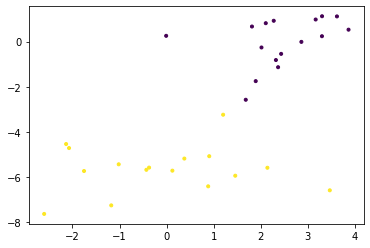

In [14]:
plt.scatter(X[:,0],X[:,1],marker='.',c=y)
plt.show()

In [118]:
class SVM:
    def __init__(self, lr=0.001, margin = 0.001, max_iters=1000):
        self.lr = lr
        self.margin = margin
        self.max_iters = max_iters
        
        # fit boundary
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1) # set y to -1 and 1 NOT 0 and 1
        y = np.expand_dims(y_, -1)
        print(y.shape)
        
        self.w = np.zeros(n_features)
        print(self.w.shape)
        self.b = 0

        for _ in range(self.max_iters):
            
            cond = y * (np.matmul(X, np.expand_dims(self.w,-1)) - self.b)
            flag = np.where(cond >=1, 0, 1)
            dLdw = 2 * self.margin * self.w - np.sum(flag * y * X, axis=0) # AXIS = 0!!
            dLdb = np.sum(flag * y)
            
            self.w -= self.lr * dLdw
            self.b -= self.lr * dLdb
            
            '''
            for idx, x_i in enumerate(X):
                # yi * (wxi - b) >= 1 if classified correctly
                # L = max(0, 1- yi(wxi-b)) + lambda*w^2
                # if correct: L = lambda * w^2
                # dL/dw = 2* lambda * w; dL/db = 0
                # if wrong: L = 1 - yi(wxi-b) + lambda * w^2
                # dL/dw = -yixi + 2*lambda*w
                # dL/db = yi
                # update w = w - lr*dL/dw; b = b - lr*dL/db
                
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.margin * self.w)
                else:
                    self.w -= self.lr * (2 * self.margin * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
            '''
                    
        print("W: ", self.w)
        print("B: ", self.b)


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [122]:
clf = SVM(margin=0.01)
clf.fit(X,y)
yhat = clf.predict(X)

(32, 1)
(2,)
W:  [-1.23142521 -1.02332002]
B:  0.8490000000000006


In [123]:
print(yhat)

[ 1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.
 -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.]


In [124]:
print(y.astype('float'))

[1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 0.]
